In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

2.LOAD THE DATASET

In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


3.VISUALIZATION
   
   1.Univariate Analysis



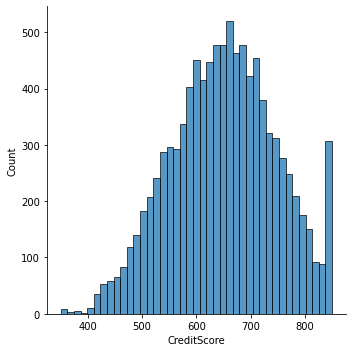

In [3]:
sns.displot(df.CreditScore)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


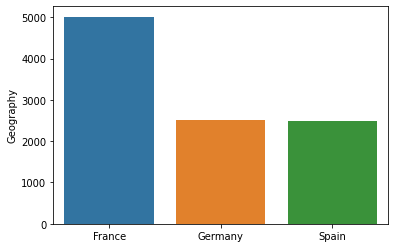

In [4]:
sns.barplot(df.Geography.value_counts().index,df.Geography.value_counts())

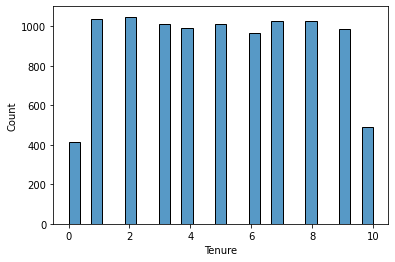

In [5]:
sns.histplot(df.Tenure)

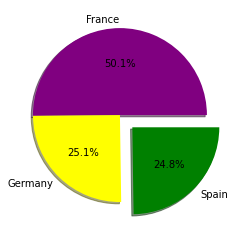

In [6]:
plt.pie(df.Geography.value_counts(),[0,0,0.2],autopct='%1.1f%%',labels=['France','Germany','Spain'],shadow=True,colors=['purple','yellow','green'])
plt.show()

2.Bivariate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


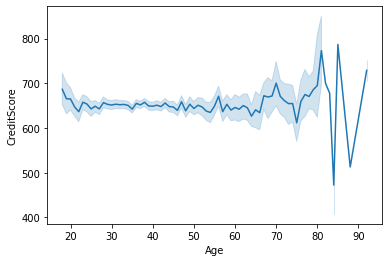

In [7]:
sns.lineplot(df.Age,df.CreditScore)

<BarContainer object of 10000 artists>

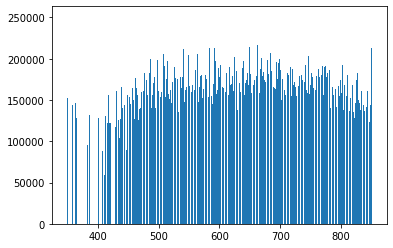

In [8]:
plt.bar(df.CreditScore,df.Balance)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


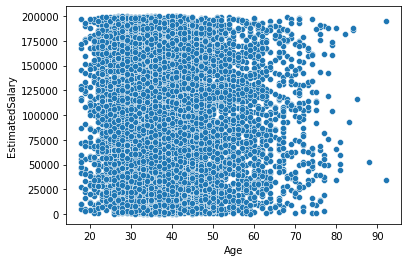

In [9]:
sns.scatterplot(df.Age,df.EstimatedSalary)

3.Multivariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdcd812dcd0>,
      dtype=object)

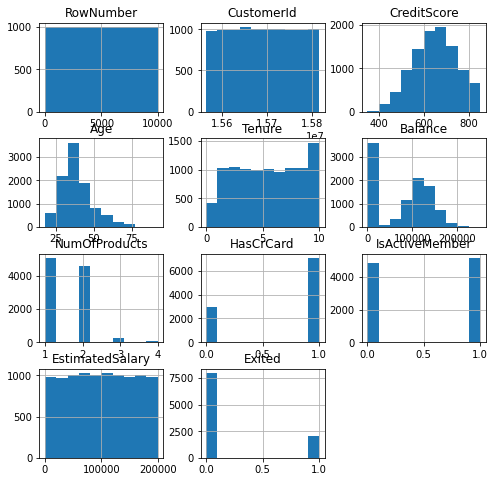

In [10]:
df.hist(figsize=[8,8])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdcd58d8690>,
      dtype=object)

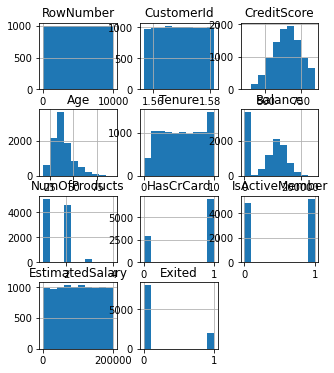

In [11]:
df.hist(figsize=[5,6])

4.DESCRIPTIVE STATISTICS

In [12]:
df.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
df.NumOfProducts.count()

10000

5.HANDLING MISSING VALUES

In [14]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

6.FIND AND REPLACE THE OUTLIERS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


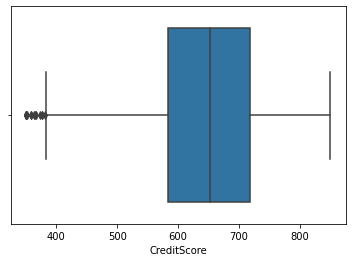

In [29]:
sns.boxplot(df.CreditScore)

In [30]:
q2=df.CreditScore.quantile(0.75)
q1=df.CreditScore.quantile(0.25)
iqr=q2-q1

In [31]:
up_limit=q2+1.5*iqr
lw_limit=q1-1.5*iqr

In [32]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


RowNumber          5.000500e+03
CustomerId         1.569074e+07
CreditScore        6.520000e+02
Age                3.700000e+01
Tenure             5.000000e+00
Balance            9.719854e+04
NumOfProducts      1.000000e+00
HasCrCard          1.000000e+00
IsActiveMember     1.000000e+00
EstimatedSalary    1.001939e+05
Exited             0.000000e+00
dtype: float64

In [33]:
df['CreditScore']=np.where(df['CreditScore']<lw_limit,652,df['CreditScore'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


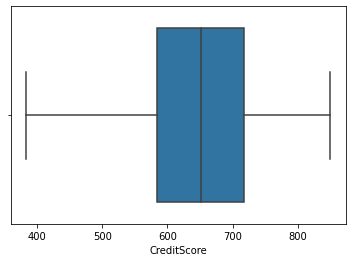

In [34]:
sns.boxplot(df.CreditScore)

7.PERFORM EMCODING

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [62]:
df.Surname=le.fit_transform(df.Surname)
df.Geography=le.fit_transform(df.Age)
df.Gender=le.fit_transform(df.Gender)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,21,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,20,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,21,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,18,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,22,0,43,2,125510.82,1,1,1,79084.10,0


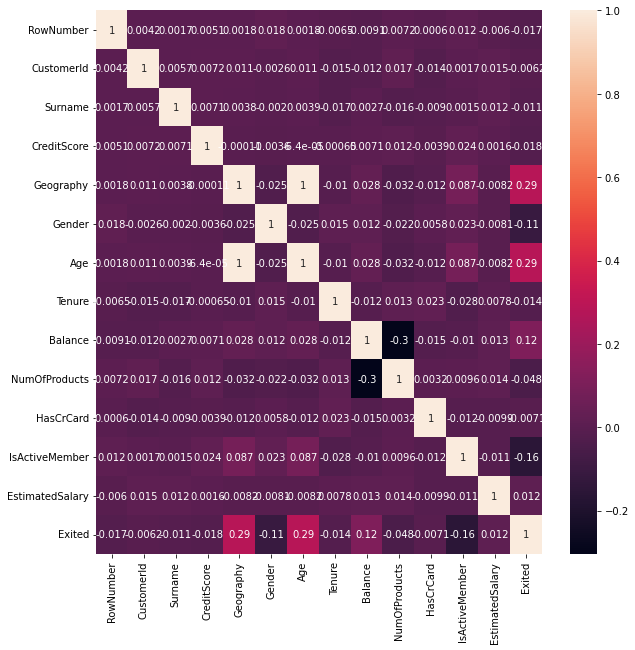

In [63]:
plt.figure(figsize=[10,10])
sns.heatmap(df.corr(),annot=True)

8.SPLIT DATA INTO DEPENDENT AND INDEPENDENT VARIABLES


In [64]:
y=df['EstimatedSalary']

In [65]:
y

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [66]:
X=df.drop(columns=['EstimatedSalary'],axis=1)

In [67]:
X.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,1,15634602,1115,619,21,0,42,2,0.00,1,1,1,1
1,2,15647311,1177,608,20,0,41,1,83807.86,1,0,1,0
2,3,15619304,2040,502,21,0,42,8,159660.80,3,1,0,1
3,4,15701354,289,699,18,0,39,1,0.00,2,0,0,0
4,5,15737888,1822,850,22,0,43,2,125510.82,1,1,1,0


9.SCALE THE INDEPENDENT VARIABLES


In [68]:
from sklearn.preprocessing import scale

In [69]:
x_scaled=pd.DataFrame(scale(X),columns=X.columns)
x_scaled.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,-1.731878,-0.783213,-0.464183,-0.332983,0.288278,-1.095988,0.288001,-1.041760,-1.225848,-0.911583,0.646092,0.970243,1.977165
1,-1.731531,-0.606534,-0.390911,-0.447572,0.191647,-1.095988,0.191424,-1.387538,0.117350,-0.911583,-1.547768,0.970243,-0.505775
2,-1.731185,-0.995885,0.628988,-1.551792,0.288278,-1.095988,0.288001,1.032908,1.333053,2.527057,0.646092,-1.030670,1.977165
3,-1.730838,0.144767,-1.440356,0.500391,-0.001614,-1.095988,-0.001729,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.505775
4,-1.730492,0.652659,0.371354,2.073384,0.384909,-1.095988,0.384577,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.505775


10.SPLIT THE DATA FOR TRAINING AND TESTING


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=0)
